Columns with null values: ['Age', 'Cabin', 'Embarked']


<ipython-input-3-18ca53e511ce>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-3-18ca53e511ce>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

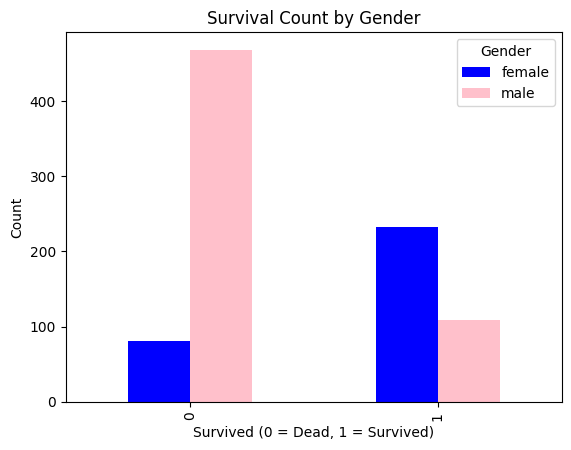

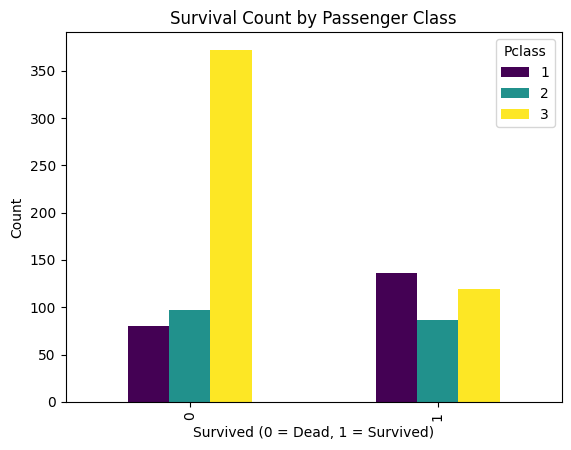

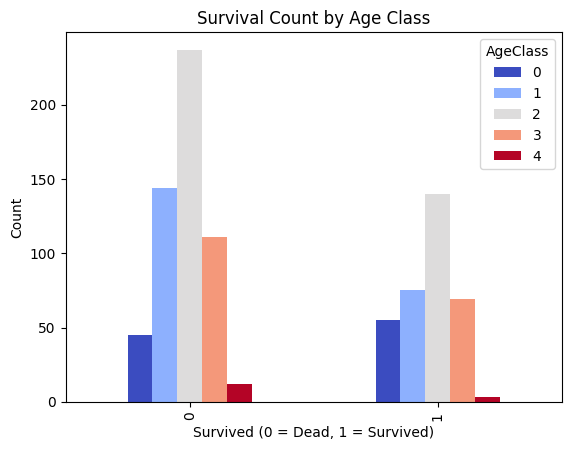

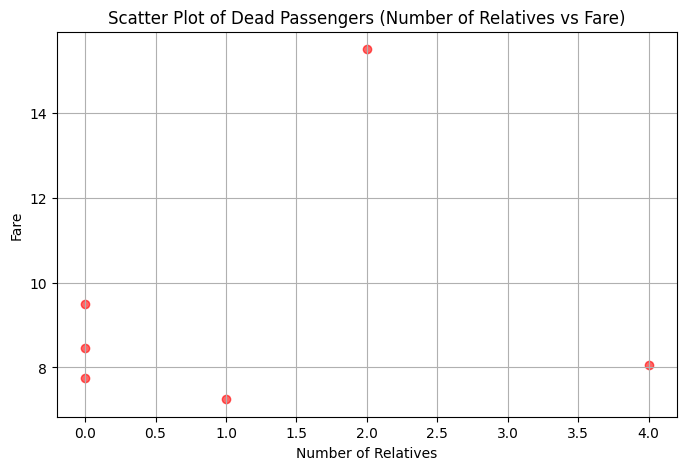

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data_url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"
df = pd.read_csv(data_url)

missing_cols = df.columns[df.isnull().any()].tolist()
print("Columns with null values:", missing_cols)

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

survival_counts = df.groupby(['Survived', 'Sex']).size().unstack()
survival_counts.plot(kind='bar', stacked=False, color=['blue', 'pink'])
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = Dead, 1 = Survived)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

pclass_counts = df.groupby(['Survived', 'Pclass']).size().unstack()
pclass_counts.plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived (0 = Dead, 1 = Survived)')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()

def age_class(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

df['AgeClass'] = df['Age'].apply(age_class)
df.drop(columns=['Age'], inplace=True)
ageclass_counts = df.groupby(['Survived', 'AgeClass']).size().unstack()
ageclass_counts.plot(kind='bar', stacked=False, colormap='coolwarm')
plt.title('Survival Count by Age Class')
plt.xlabel('Survived (0 = Dead, 1 = Survived)')
plt.ylabel('Count')
plt.legend(title='AgeClass')
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Survived': [0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
    'SibSp': [1, 0, 3, 0, 0, 1, 0, 2, 1, 0],
    'Parch': [0, 2, 1, 1, 0, 1, 0, 0, 2, 0],
    'Fare': [7.25, 71.83, 8.05, 53.1, 8.46, 12.29, 9.5, 15.5, 26.55, 7.75]  # Fare price
}

df = pd.DataFrame(data)
df['Number of Relatives'] = df['SibSp'] + df['Parch']
dead_passengers = df[df['Survived'] == 0]

plt.figure(figsize=(8, 5))
plt.scatter(dead_passengers['Number of Relatives'], dead_passengers['Fare'], color='red', alpha=0.6)
plt.xlabel('Number of Relatives')
plt.ylabel('Fare')
plt.title('Scatter Plot of Dead Passengers (Number of Relatives vs Fare)')
plt.grid(True)
plt.show()